<a href="https://colab.research.google.com/github/sungkim11/forecast-sales/blob/main/forecast_sales_using_prophet_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecast Sales Using Prophet

## 1. Prequisites

Following are prerequisite for this tutorial:
- Data
- Python Package: fbprophet or Facebook Prophet

### 1.1. Data

Three data sources were used for this tutorial where United Stated Census Bureau Monthly Retail Sales is used to forecast future sales and  both FRED Data and OECD Data were used as Regressors data.

**United Stated Census Bureau Monthly Retail Sales**<BR>
United Stated Census Bureau maintains Monthly Retail Trade Report, from January 1992 to Present. This data was picked to illustrate forecasting because it has extensive historical data with same monthly frequency. Data is available as Excel spreadsheet format at https://www.census.gov/retail/mrts/www/mrtssales92-present.xls

**FRED Data: https://fred.stlouisfed.org/**
- Inflation
- CPI
- M1
- M2
- Interest Rate

**OECD Data: https://data.oecd.org/leadind/composite-leading-indicator-cli.htm#indicator-chart**
- Composite leading indicator (CLI)
- Business confidence index (BCI)
- Consumer confidence index (CCI)

### 1.2. Python Packages

#### 1.2.1. Install Prophet

**Please  note  that  you  only  need  to  run install  once.**

In [1]:
!pip install pystan==2.19.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975258 sha256=08e8008d4f05cc49654dcaf3fefb6fd5a1ec7bcce116fae56402b34235942555
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [6]:
!pip install holidays==0.18 -v

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 kB 3.8 MB/s eta 0:00:00
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  changing mode of /usr/local/bin/censusgeocode to 755
  Attempting uninstall: holidays
    Found existing installation: holidays 0.46
    Uninstalling holidays-0.46:
      Removing file or directory /usr/local/lib/python3.10/dist-packages/holidays-0.46.dist-info/
      Removing file or directory /usr/local/lib/python3.10/dist-packages/holidays/
      Successfully uninstalled holidays-0.46
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.5 requires holidays>=0.25, but you have holidays 0.18 which is incompatible.


In [9]:
!pip install lunarcalendar -v

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  changing mode of /usr/local/bin/lunar-find to 755


In [10]:
!pip install fbprophet -v

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info
  writing /tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  no previously-included directories found matching 'fbprophet/stan_model'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-747rdtl3/fbprophet.egg-info

In [40]:
pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.22.0 which is incompatible.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
prophet 1.1.5 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
prophet 1.1.5 requires holidays>=0.25, but you have holidays 0.18 which is incompatible

In [19]:
pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
prophet 1.1.5 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
prophet 1.1.5 requires holidays>=0.25, but you have holidays 0.18 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have 

## 2. Code

#### 2.1. Import Python Package

Import python packages and show its version. Showing version is important since it will enable other users to replicate your work using same python version and python packages version.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib as plt
import fbprophet
from fbprophet import Prophet
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import platform

from pandas.tseries.offsets import MonthBegin
from pandas.tseries.offsets import MonthEnd

from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

print('Python: ', platform.python_version())
print('pandas: ', pd.__version__)
print('matplotlib: ', plt.__version__)
print('Prophet: ', fbprophet.__version__)
print('statsmodels: ', statsmodels.__version__)

Python:  3.10.12
pandas:  1.3.5
matplotlib:  3.7.1
Prophet:  0.7.1
statsmodels:  0.14.1


### 2.2. Mount Storage

### 2.3. Exploratory Data Analysis

#### Import and validate dataset

In [41]:
retail_sales = pd.read_csv('/content/drive/MyDrive/forecasting/sales_prophet/sales_data.csv', index_col = 0)
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1/1/2005 to 1/1/2022
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sales_total  205 non-null    int64
dtypes: int64(1)
memory usage: 3.2+ KB


In [3]:
retail_sales.head(5)

,sales_total
month,
1/1/2005,293261
2/1/2005,295062
3/1/2005,339141
4/1/2005,335632
5/1/2005,345348


#### Set Index then convert month date to month-end because of fbprophet's use of month-end date.

In [4]:
retail_sales.index = pd.to_datetime(retail_sales.index)
retail_sales.reset_index(inplace = True)
retail_sales['month'] = pd.to_datetime(retail_sales['month']) + MonthEnd(1)
retail_sales.set_index(['month'], inplace = True)
retail_sales.index = pd.to_datetime(retail_sales.index)
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2005-01-31 to 2022-01-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sales_total  205 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [5]:
retail_sales.head(5)

,sales_total
month,
2005-01-31,293261
2005-02-28,295062
2005-03-31,339141
2005-04-30,335632
2005-05-31,345348


#### Split Datasets

Split datasets:
- Actuals
- Train
- Test
- Validate
- Cross Validate

In [6]:
retail_sales_actuals = retail_sales.loc['2005-01-01':'2018-12-31']
retail_sales_train = retail_sales_actuals.loc['2005-01-01':'2016-12-31']
retail_sales_test = retail_sales_actuals.loc['2017-01-01':'2018-12-31']
retail_sales_traintest = retail_sales_actuals.loc['2005-01-01':'2018-12-31']
retail_sales_validate = retail_sales.loc['2019-01-01':'2021-12-31']
retail_sales_cross_validate = retail_sales.loc['2017-01-01':'2021-12-31']

print('Actuals: ', retail_sales_actuals.shape)
print('Train: ', retail_sales_train.shape)
print('Test: ', retail_sales_test.shape)
print('Train and Test: ', retail_sales_traintest.shape)
print('Validate: ', retail_sales_validate.shape)
print('Cross Validate: ', retail_sales_cross_validate.shape)

Actuals:  (168, 1)
Train:  (144, 1)
Test:  (24, 1)
Train and Test:  (168, 1)
Validate:  (36, 1)
Cross Validate:  (60, 1)


#### Set Plotting Parameters

In [7]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

#### Chart Retail Sales

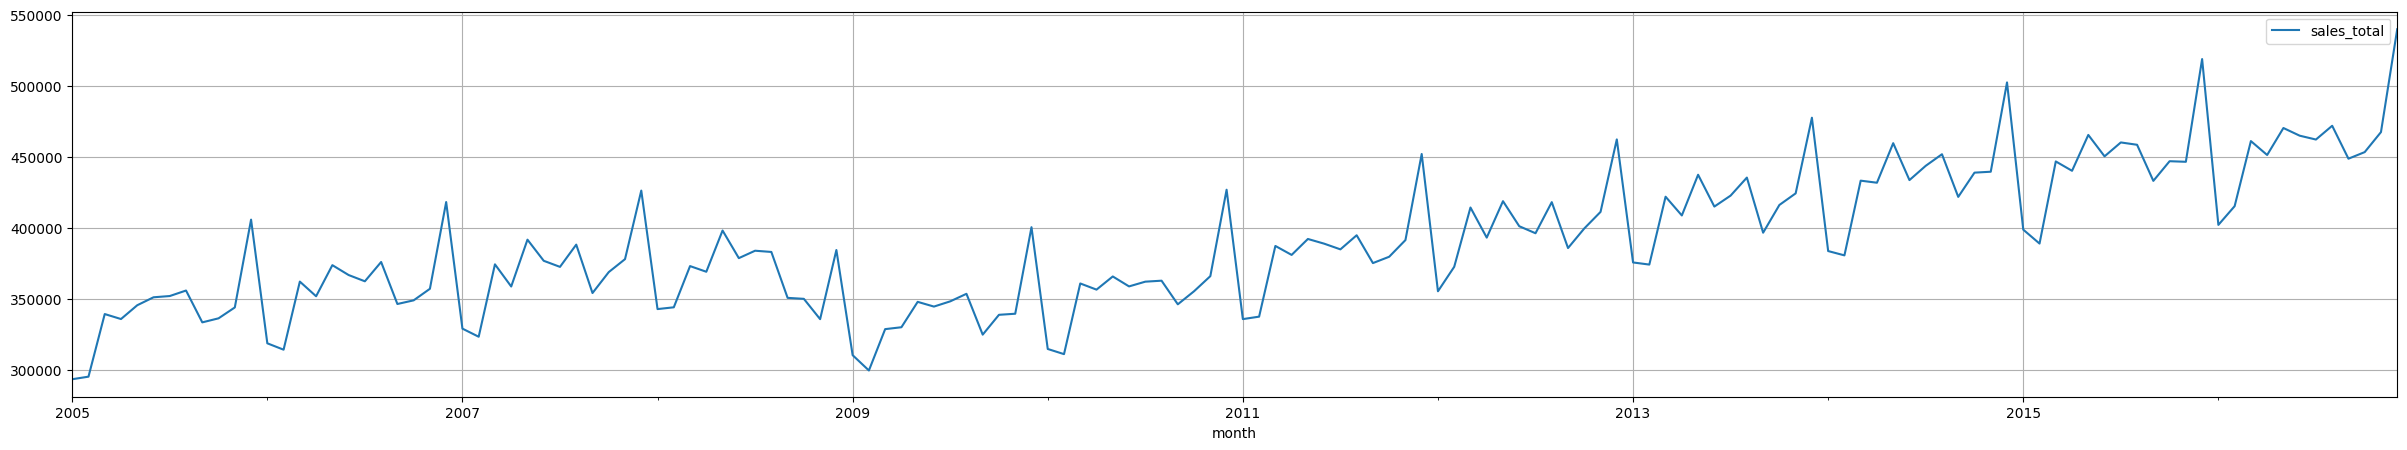

In [8]:
retail_sales_train.reset_index().plot(x='month', y='sales_total', kind='line', grid=1)
plt.pyplot.show()

#### Determine Retail Sales Data (Time-Series) has trend

Next, we need to determine if the retail sales data is non-stationary or it has trends using Dickey Fuller Test, which is a statistical hypothesis test that allows you to detect non-stationarity. The stationary time-series implies there is no predictable pattern in the long term.

In [9]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(retail_sales_train.sales_total.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -0.4111466226158254
ADF p-values: 0.9082209893408635
ADF number of lags used: 14
ADF number of observations: 129
ADF critical values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
ADF best information criterion: 2712.938864098956


Looking at the value, which is bigger than 0.05, you can determine time-series data is non-stationary.

#### Decompose Retail Sales to Determine Which Model to Use

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

Multiplicative Model Analysis

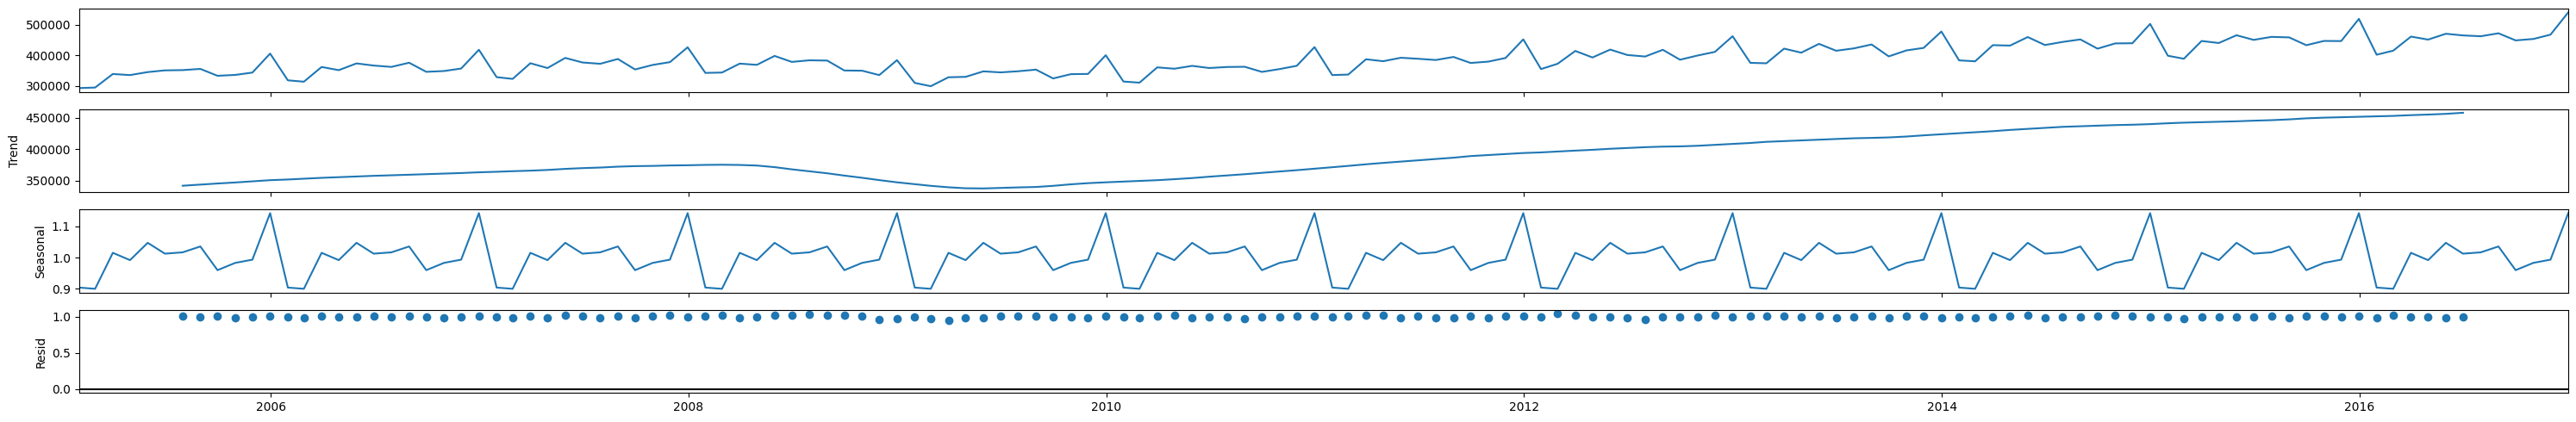

In [10]:
retail_sales_train.index = pd.to_datetime(retail_sales_train.index)
retail_sales_train_decompose_multi = seasonal_decompose(retail_sales_train, model='multiplicative')
retail_sales_train_decompose_multi.plot().show()

In [11]:
retail_sales_train_decompose_multi_resid = retail_sales_train_decompose_multi.resid.sum()
# retail_sales_train_decompose_multi_resid.sales_total

In [12]:
retail_sales_train_decompose_multi_resid

132.00368387124905

Additive Model Analysis

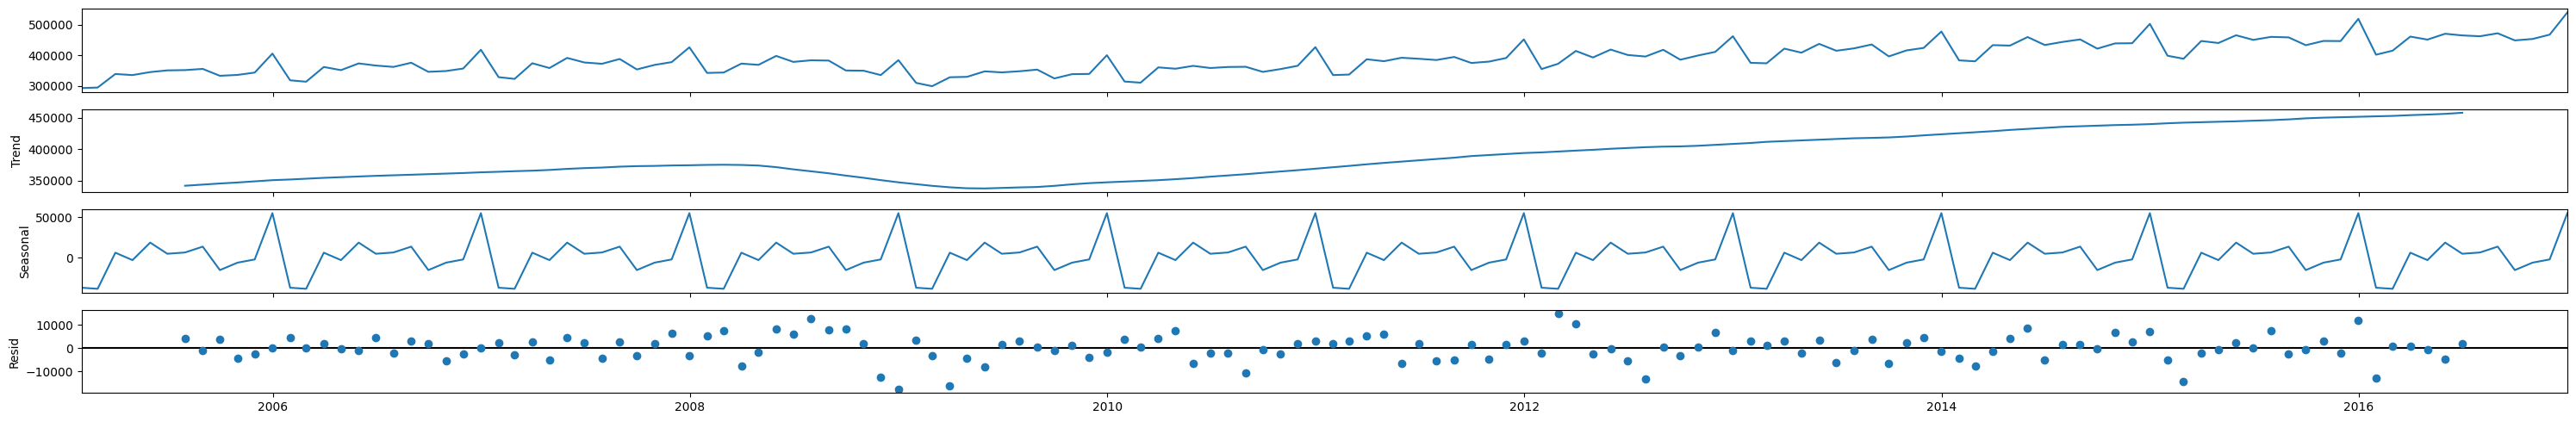

In [13]:
retail_sales_train_decompose_add = seasonal_decompose(retail_sales_train, model='additive')
retail_sales_train_decompose_add.plot().show()

In [14]:
retail_sales_train_decompose_add_resid = retail_sales_train_decompose_add.resid.sum()
# retail_sales_train_decompose_add_resid.sales_total
retail_sales_train_decompose_add_resid

4523.166666669258

Looking at Residual chart, multiplicative chart is smoother, so we will use multiplicative model, but just check programatically compare simple sum of residual values.

In [15]:
# if retail_sales_train_decompose_multi_resid.values < retail_sales_train_decompose_add_resid.values:
if retail_sales_train_decompose_multi_resid < retail_sales_train_decompose_add_resid:

    print("Multiplicate  Model")
else:
    print("Additive  Model")

Multiplicate  Model


#### Prep Train Dataset

In [16]:
retail_sales_train = retail_sales_train.reset_index()
retail_sales_train.columns = ['ds', 'y']
retail_sales_train.head()

,ds,y
0,2005-01-31,293261
1,2005-02-28,295062
2,2005-03-31,339141
3,2005-04-30,335632
4,2005-05-31,345348


#### Develop and Fit Forecast Model then Forecast Sales (for Test) using Forecast Model

In [17]:
retail_sales_model = Prophet(yearly_seasonality=True,  seasonality_mode='multiplicative')
retail_sales_model.fit(retail_sales_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
retail_sales_future = retail_sales_model.make_future_dataframe(freq='M', periods=24)
retail_sales_future.head(5)

,ds
0,2005-01-31
1,2005-02-28
2,2005-03-31
3,2005-04-30
4,2005-05-31


In [23]:
retail_sales_forecast = retail_sales_model.predict(retail_sales_future)
retail_sales_forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
163,2018-08-31,489373.416749,488153.934113,518887.169367,475042.029228,501341.744877,0.029269,0.029269,0.029269,0.029269,0.029269,0.029269,0.0,0.0,0.0,503696.907830
164,2018-09-30,490473.527529,453775.981168,483508.865592,474310.137378,503443.584451,-0.042547,-0.042547,-0.042547,-0.042547,-0.042547,-0.042547,0.0,0.0,0.0,469605.504927
165,2018-10-31,491610.308668,465084.338535,497632.146377,474409.979593,505318.486086,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,0.0,0.0,0.0,482437.938175
166,2018-11-30,492710.419447,471174.802746,506486.321251,474179.789335,507688.705617,-0.005947,-0.005947,-0.005947,-0.005947,-0.005947,-0.005947,0.0,0.0,0.0,489780.448462
167,2018-12-31,493847.200586,542592.657885,584379.486628,474232.765046,509771.810291,0.142762,0.142762,0.142762,0.142762,0.142762,0.142762,0.0,0.0,0.0,564349.855359


#### Chart Sales Forecast

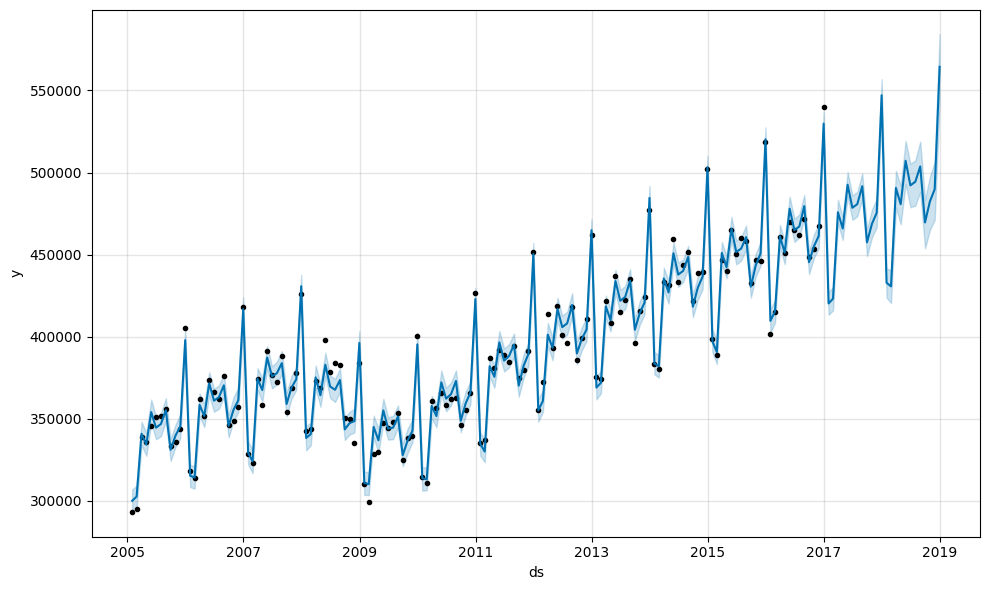

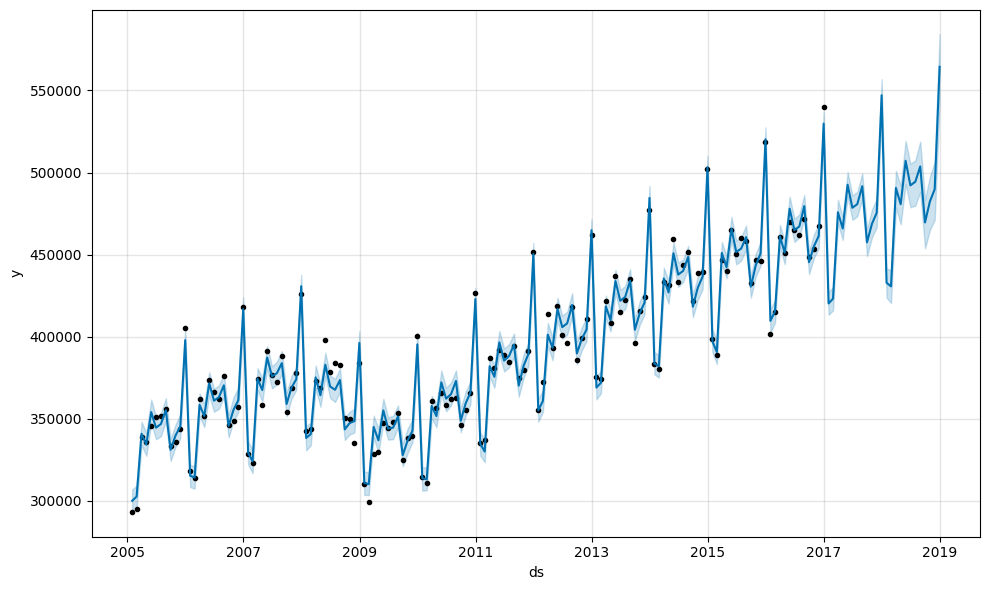

In [24]:
retail_sales_model.plot(retail_sales_forecast)

#### Chart Sales Forecast Components

/usr/local/lib/python3.10/dist-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


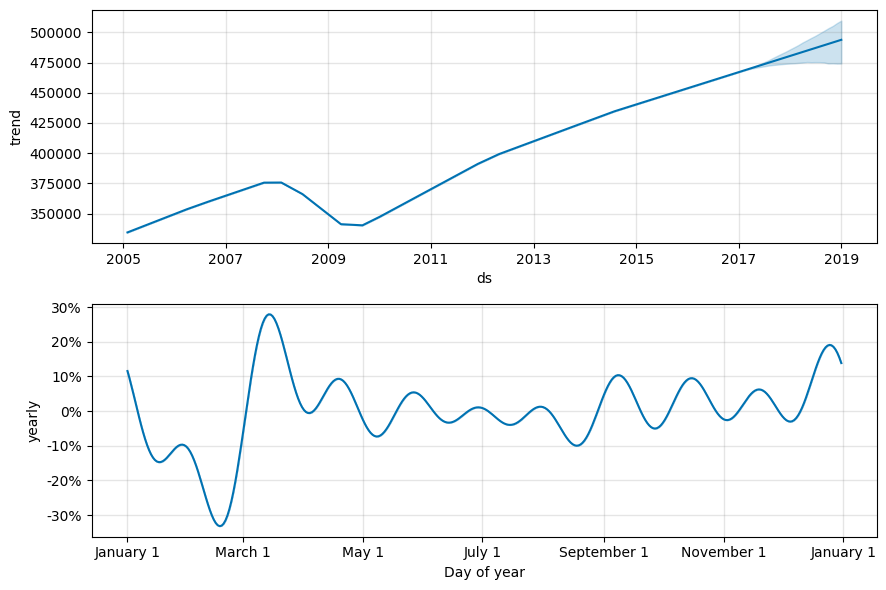

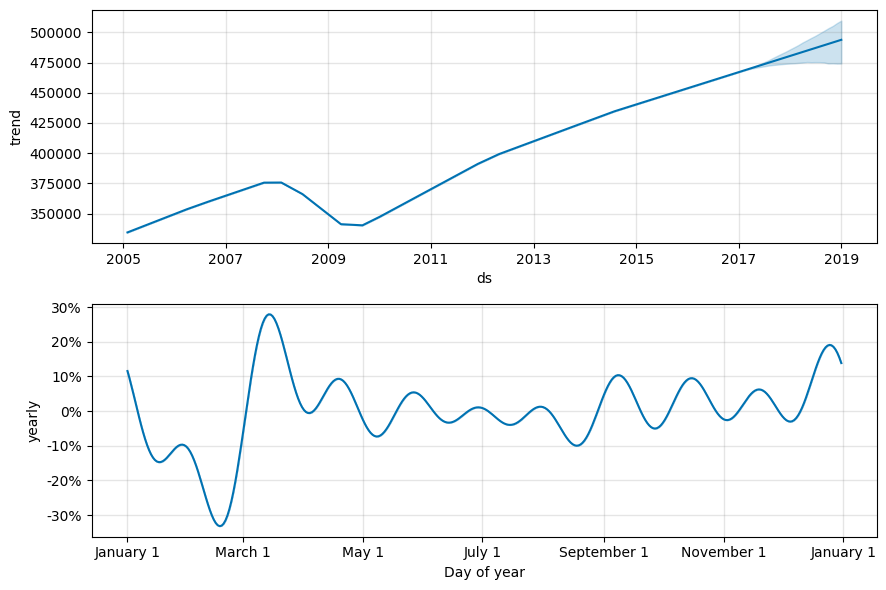

In [25]:
retail_sales_model.plot_components(retail_sales_forecast)

#### Validate Sales Forecast  -  Prophet  Validation Method



In [26]:
retail_sales_cv = cross_validation(retail_sales_model, initial = '1825 days', period='365 days', horizon=' 2190 days', parallel='processes')
retail_sales_cv.tail(5)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2011-01-02 00:00:00 and 2011-01-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7870ca74e4d0>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
67,2016-08-31,493464.807946,307500.862128,667835.830805,471690,2011-01-02
68,2016-09-30,461081.838597,283519.272491,624324.505671,448516,2011-01-02
69,2016-10-31,469058.991271,285324.132952,639472.321031,453155,2011-01-02
70,2016-11-30,464920.179023,279393.706466,636108.943618,467232,2011-01-02
71,2016-12-31,551673.946020,328438.672601,758848.233338,539667,2011-01-02


In [27]:
retail_sales_p = performance_metrics(retail_sales_cv)
retail_sales_p.tail(5)

,horizon,mse,rmse,mae,mape,mdape,coverage
61,2068 days,2.893011e+08,17008.854017,15334.111923,0.033400,0.030873,1.0
62,2098 days,2.958062e+08,17199.018473,15614.916026,0.033754,0.030873,1.0
63,2129 days,3.301522e+08,18170.090280,17381.528935,0.037672,0.035096,1.0
64,2159 days,3.097958e+08,17601.016811,15974.801110,0.034528,0.035096,1.0
65,2190 days,2.899514e+08,17027.959096,15286.520673,0.032594,0.030873,1.0


/usr/local/lib/python3.10/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


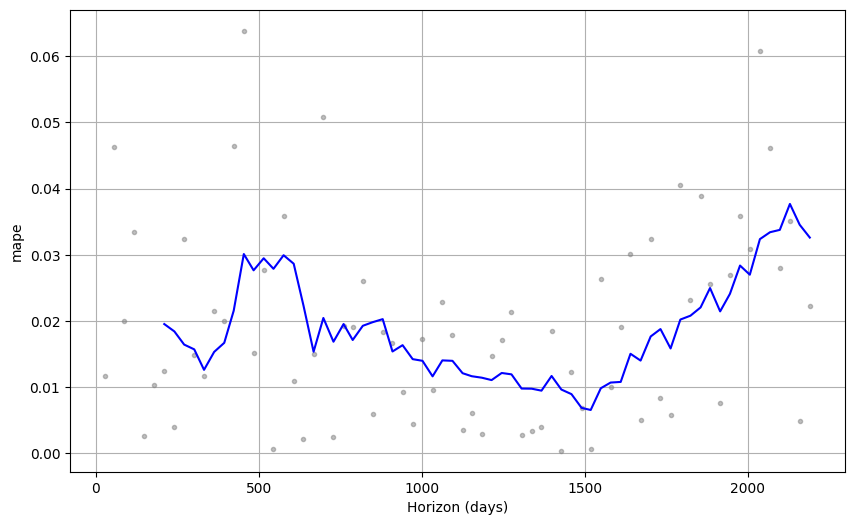

In [28]:
fig = plot_cross_validation_metric(retail_sales_cv, metric='mape')

In [29]:
retail_sales_p.mean()

horizon     1199 days 18:10:54.545454544
mse                      101856590.45691
rmse                         9389.267118
mae                          7933.220586
mape                            0.018631
mdape                           0.016724
coverage                        0.935065
dtype: object

####Validate Sales Forecast - Forecast All  Methods

In [30]:
retail_sales_forecast_filtered = retail_sales_forecast.filter(["ds","yhat"])
retail_sales_forecast_filtered.head(5)

,ds,yhat
0,2005-01-31,300107.873797
1,2005-02-28,302682.305148
2,2005-03-31,340930.600428
3,2005-04-30,334378.958993
4,2005-05-31,354126.836294


In [31]:
retail_sales_forecast_filtered.columns = ['Month', 'Prediction']
retail_sales_forecast_filtered = retail_sales_forecast_filtered.set_index('Month')
retail_sales_validate = pd.DataFrame(retail_sales_forecast_filtered, index =retail_sales_test.index, columns=['Prediction'])
retail_sales_validate = pd.concat([retail_sales_test, retail_sales_validate], axis=1)
retail_sales_validate.head(5)

,sales_total,Prediction
month,,
2017-01-31,421943,420261.493669
2017-02-28,418315,423186.007599
2017-03-31,483082,475819.656044
2017-04-30,465788,465883.191925
2017-05-31,494621,492537.105605


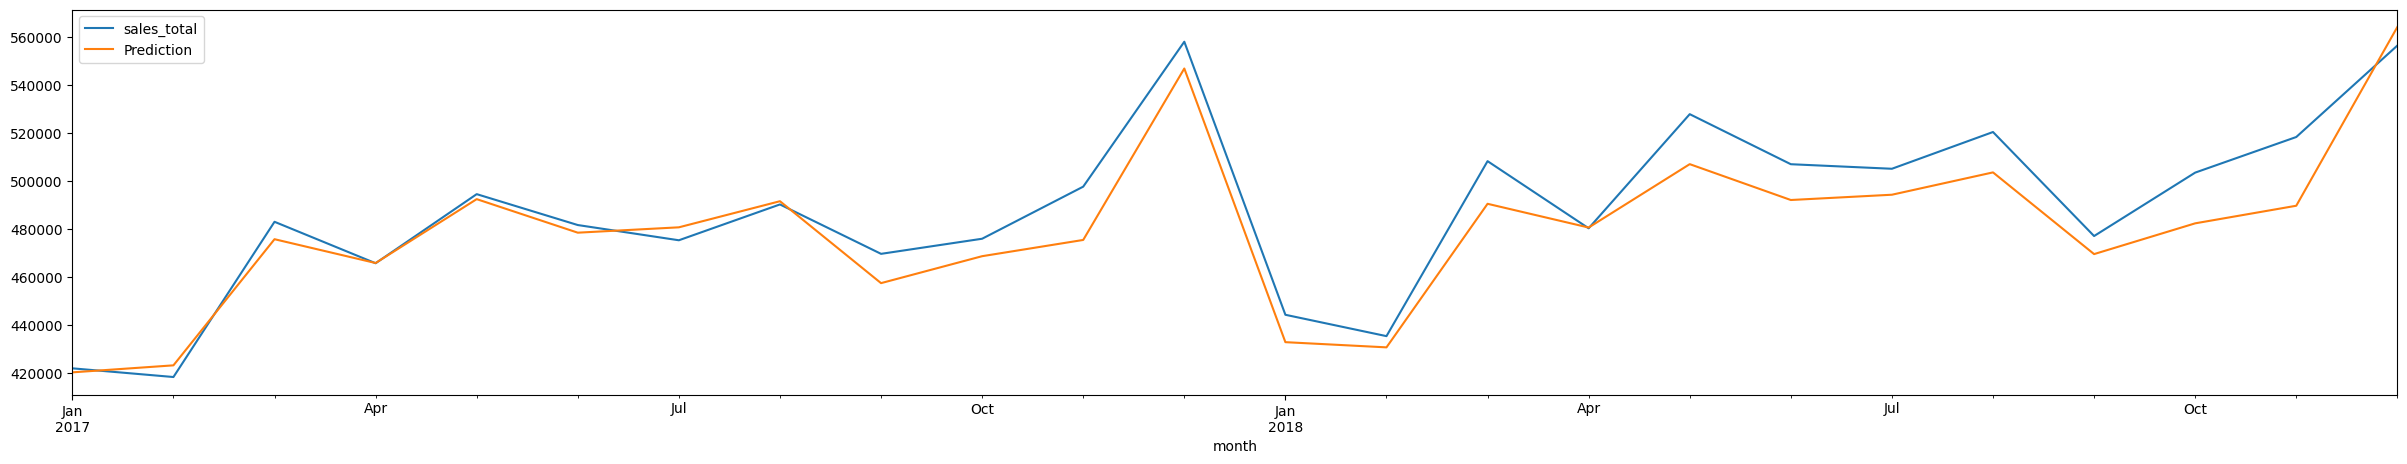

In [32]:
retail_sales_validate.plot()
plt.pyplot.show()

In [33]:
retail_sales_validate['Abs Diff'] = (retail_sales_validate['sales_total'] - retail_sales_validate['Prediction']).abs()
retail_sales_validate['Abs Diff %'] = (retail_sales_validate['sales_total'] - retail_sales_validate['Prediction']).abs()/retail_sales_validate['sales_total']
retail_sales_validate.loc['Average Abs Diff %'] = pd.Series(retail_sales_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
retail_sales_validate.loc['Min Abs Diff %'] = pd.Series(retail_sales_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
retail_sales_validate.loc['Max Abs Diff %'] = pd.Series(retail_sales_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
retail_sales_validate.tail(10)

,sales_total,Prediction,Abs Diff,Abs Diff %
month,,,,
2018-06-30 00:00:00,507106.0,492173.089131,14932.910869,0.029447
2018-07-31 00:00:00,505209.0,494377.028664,10831.971336,0.021441
2018-08-31 00:00:00,520544.0,503696.907830,16847.092170,0.032364
2018-09-30 00:00:00,477137.0,469605.504927,7531.495073,0.015785
2018-10-31 00:00:00,503602.0,482437.938175,21164.061825,0.042025
2018-11-30 00:00:00,518457.0,489780.448462,28676.551538,0.055311
2018-12-31 00:00:00,556614.0,564349.855359,7735.855359,0.013898
Average Abs Diff %,NaN,NaN,NaN,0.020155
Min Abs Diff %,NaN,NaN,NaN,0.000204


####  Forecast Sales All using same Forecast Model

Using same forecast model, forecast sales for all months till Deceomber 2021.

In [34]:
retail_sales_future_all = retail_sales_model.make_future_dataframe(freq='M', periods=60)
retail_sales_forecast_all = retail_sales_model.predict(retail_sales_future_all)
retail_sales_forecast_all.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
199,2021-08-31,529564.130560,479366.273290,620177.676438,462494.923686,602219.149177,0.032947,0.032947,0.032947,0.032947,0.032947,0.032947,0.0,0.0,0.0,547011.847258
200,2021-09-30,530664.241339,444025.686438,578439.375151,461826.198832,604715.788067,-0.041083,-0.041083,-0.041083,-0.041083,-0.041083,-0.041083,0.0,0.0,0.0,508862.861959
201,2021-10-31,531801.022478,451735.844672,596056.176095,460816.280548,606876.484972,-0.019857,-0.019857,-0.019857,-0.019857,-0.019857,-0.019857,0.0,0.0,0.0,521241.240011
202,2021-11-30,532901.133257,457615.131425,605724.792181,460872.520858,609719.864350,-0.007964,-0.007964,-0.007964,-0.007964,-0.007964,-0.007964,0.0,0.0,0.0,528657.079359
203,2021-12-31,534037.914396,524383.748296,699447.626066,459886.142454,612978.035482,0.138565,0.138565,0.138565,0.138565,0.138565,0.138565,0.0,0.0,0.0,608036.941476


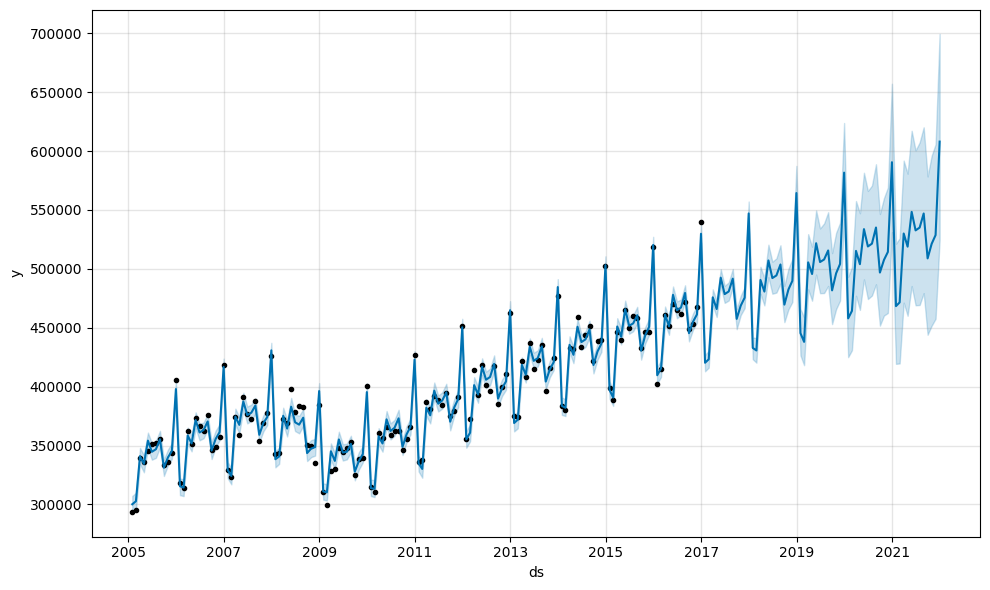

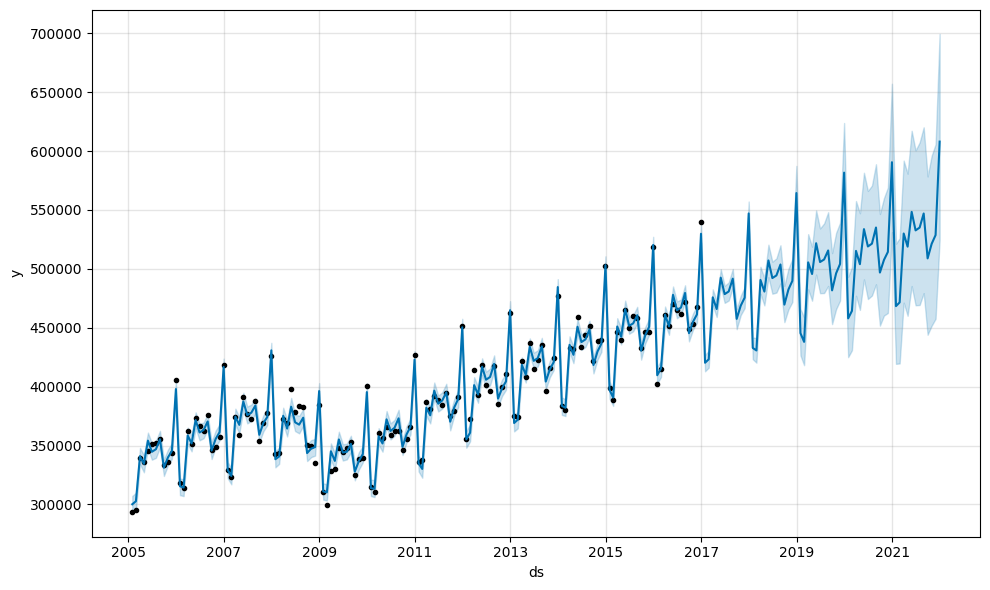

In [35]:
retail_sales_model.plot(retail_sales_forecast_all)

/usr/local/lib/python3.10/dist-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


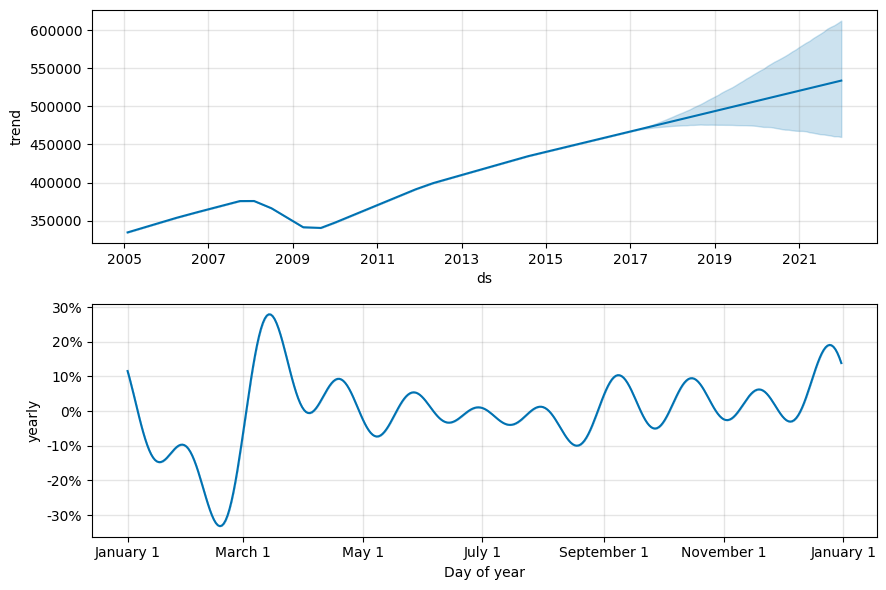

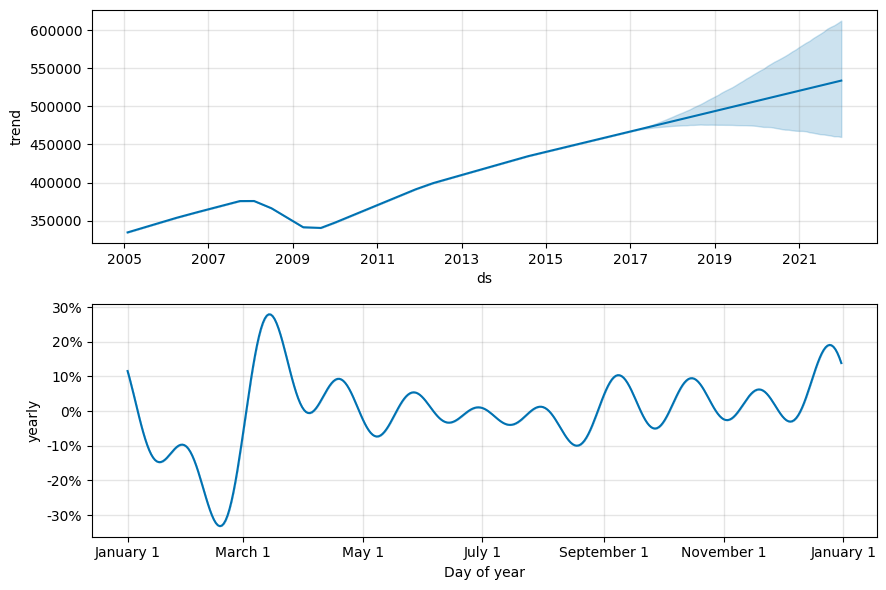

In [36]:
retail_sales_model.plot_components(retail_sales_forecast_all)

####  Validate Sales All Forecast - All Forecast Methodology

Please  note  that  forecast  will  not  perform  well  for  both  calendar  year  2020  and  2021.

In [37]:
retail_sales_forecast_all_filtered = retail_sales_forecast_all.filter(["ds","yhat"])
retail_sales_forecast_all_filtered.head(5)

,ds,yhat
0,2005-01-31,300107.873797
1,2005-02-28,302682.305148
2,2005-03-31,340930.600428
3,2005-04-30,334378.958993
4,2005-05-31,354126.836294


In [38]:
retail_sales_forecast_all_filtered.columns = ['Month', 'Prediction']
retail_sales_forecast_all_filtered = retail_sales_forecast_all_filtered.set_index('Month')
retail_sales_validate_all = pd.DataFrame(retail_sales_forecast_all_filtered, index =retail_sales_cross_validate.index, columns=['Prediction'])
retail_sales_validate_all = pd.concat([retail_sales_cross_validate, retail_sales_validate_all], axis=1)
retail_sales_validate_all.head(5)

,sales_total,Prediction
month,,
2017-01-31,421943,420261.493669
2017-02-28,418315,423186.007599
2017-03-31,483082,475819.656044
2017-04-30,465788,465883.191925
2017-05-31,494621,492537.105605


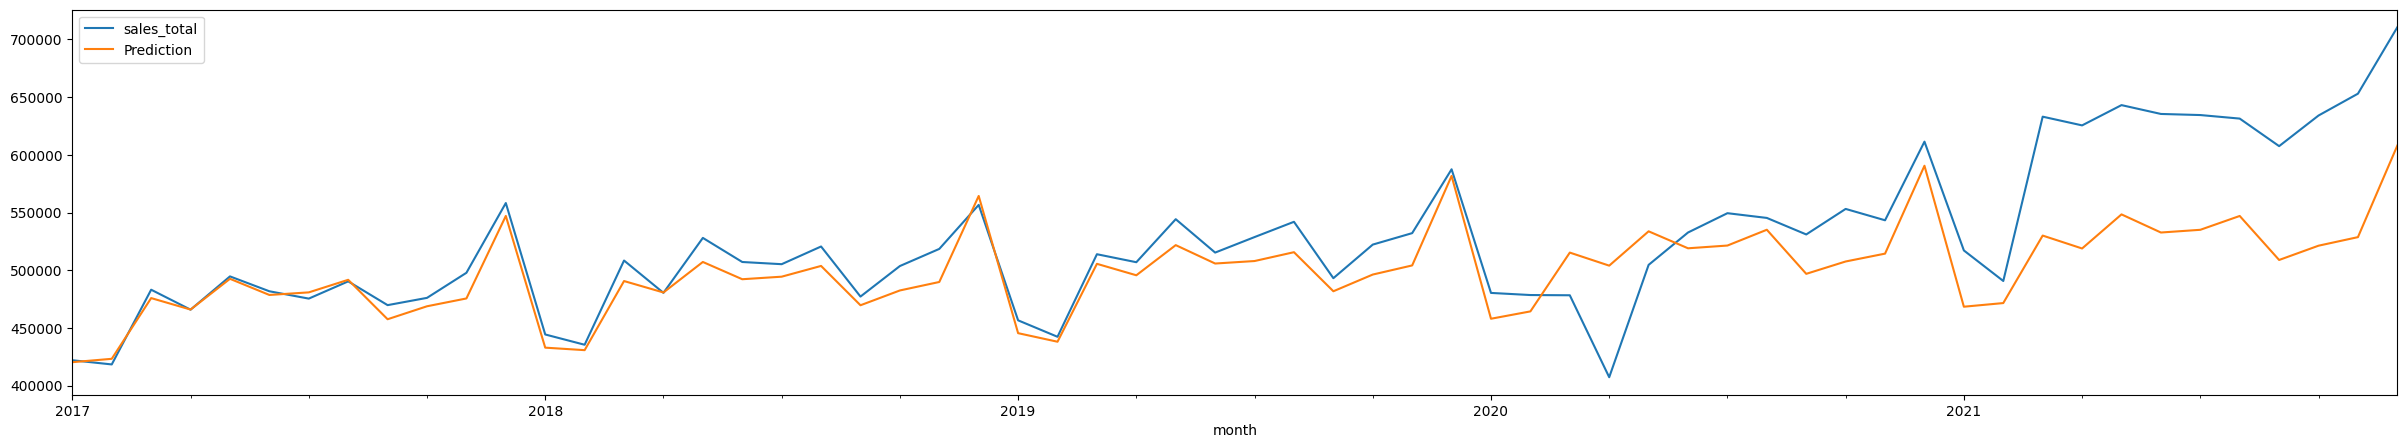

In [39]:
retail_sales_validate_all.plot()
plt.pyplot.show()

In [40]:
retail_sales_validate_all['Abs Diff'] = (retail_sales_validate_all['sales_total'] - retail_sales_validate_all['Prediction']).abs()
retail_sales_validate_all['Abs Diff %'] = (retail_sales_validate_all['sales_total'] - retail_sales_validate_all['Prediction']).abs()/retail_sales_validate_all['sales_total']
retail_sales_validate_all.loc['Average Abs Diff %'] = pd.Series(retail_sales_validate_all['Abs Diff %'].mean(), index = ['Abs Diff %'])
retail_sales_validate_all.loc['Min Abs Diff %'] = pd.Series(retail_sales_validate_all['Abs Diff %'].min(), index = ['Abs Diff %'])
retail_sales_validate_all.loc['Max Abs Diff %'] = pd.Series(retail_sales_validate_all['Abs Diff %'].max(), index = ['Abs Diff %'])
retail_sales_validate_all.tail(10)

,sales_total,Prediction,Abs Diff,Abs Diff %
month,,,,
2021-06-30 00:00:00,635437.0,532660.442913,102776.557087,0.161742
2021-07-31 00:00:00,634486.0,535018.845594,99467.154406,0.156768
2021-08-31 00:00:00,631415.0,547011.847258,84403.152742,0.133673
2021-09-30 00:00:00,607540.0,508862.861959,98677.138041,0.162421
2021-10-31 00:00:00,634076.0,521241.240011,112834.759989,0.177951
2021-11-30 00:00:00,653011.0,528657.079359,124353.920641,0.190432
2021-12-31 00:00:00,710619.0,608036.941476,102582.058524,0.144356
Average Abs Diff %,NaN,NaN,NaN,0.055979
Min Abs Diff %,NaN,NaN,NaN,0.000204
